In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('spam.xlsx')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5407, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5407 non-null   object
 1   v2          5407 non-null   object
 2   Unnamed: 2  76 non-null     object
 3   Unnamed: 3  31 non-null     object
 4   Unnamed: 4  17 non-null     object
 5   Unnamed: 5  5 non-null      object
 6   Unnamed: 6  2 non-null      object
 7   Unnamed: 7  2 non-null      object
 8   Unnamed: 8  1 non-null      object
 9   Unnamed: 9  1 non-null      object
dtypes: object(10)
memory usage: 422.6+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],inplace=True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5402,spam,False
5403,ham,False
5404,ham,"Pity, * was in mood for that. So...any other s..."
5405,ham,The guy did some bitching but I acted like i'd...


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
195,ham,Gud mrng dear hav a nice day
4352,ham,Ranjith cal drpd Deeraj and deepak 5min hold
3768,ham,I am joining today formally.Pls keep praying.w...
3660,ham,K.i will send in &lt;#&gt; min:)
3730,ham,Watching tv lor. Nice one then i like lor.


In [9]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# check for duplicate values
df.duplicated().sum()

809

In [11]:
df=df.drop_duplicates(keep='first')

In [12]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5400,ham,Huh y lei...
5401,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5404,ham,"Pity, * was in mood for that. So...any other s..."
5405,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.shape

(4598, 2)

# EDA

In [14]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

target
ham     4171
spam     427
Name: count, dtype: int64

In [16]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x164e3f98690>,
 [Text(-1.0535166176276187, 0.3163901648004599, 'ham'),
  Text(1.053516602816325, -0.3163902141191318, 'spam')],
 [Text(-0.5746454277968829, 0.17257645352752354, '90.71'),
  Text(0.5746454197179953, -0.17257648042861734, '9.29')])

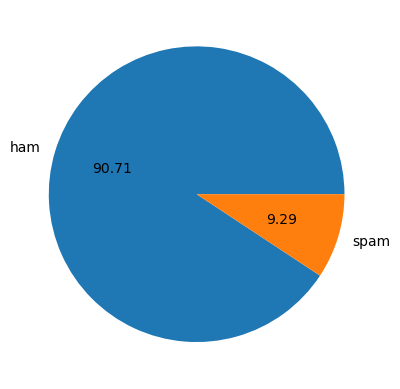

In [17]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

#data embalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['text'].str.len()

C:\Users\Hp\AppData\Local\Temp\ipykernel_13496\1778977070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].str.len()


In [21]:
df

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111.0
1,ham,Ok lar... Joking wif u oni...,29.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,ham,U dun say so early hor... U c already then say...,49.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0
...,...,...,...
5400,ham,Huh y lei...,12.0
5401,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147.0
5404,ham,"Pity, * was in mood for that. So...any other s...",57.0
5405,ham,The guy did some bitching but I acted like i'd...,125.0


#number of words

In [22]:
def count_total_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return 0

In [23]:
df['word_lengths'] = df['text'].apply(count_total_words)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13496\3075862056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_lengths'] = df['text'].apply(count_total_words)


In [24]:
df

,target,text,num_characters,word_lengths
0,ham,"Go until jurong point, crazy.. Available only ...",111.0,20
1,ham,Ok lar... Joking wif u oni...,29.0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,28
3,ham,U dun say so early hor... U c already then say...,49.0,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0,13
...,...,...,...,...
5400,ham,Huh y lei...,12.0,3
5401,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147.0,28
5404,ham,"Pity, * was in mood for that. So...any other s...",57.0,10
5405,ham,The guy did some bitching but I acted like i'd...,125.0,26


In [25]:
def count_sentences(text):
    if isinstance(text, str):
        sentences = nltk.sent_tokenize(text)
        return len(sentences)
    else:
        return 0

In [26]:
df['total sentences']=df['text'].apply(count_sentences)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13496\3806634928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total sentences']=df['text'].apply(count_sentences)


In [27]:
df

,target,text,num_characters,word_lengths,total sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111.0,20,2
1,ham,Ok lar... Joking wif u oni...,29.0,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,28,2
3,ham,U dun say so early hor... U c already then say...,49.0,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0,13,1
...,...,...,...,...,...
5400,ham,Huh y lei...,12.0,3,1
5401,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147.0,28,1
5404,ham,"Pity, * was in mood for that. So...any other s...",57.0,10,2
5405,ham,The guy did some bitching but I acted like i'd...,125.0,26,1


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_13496\1914993857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=encoder.fit_transform(df['target'])


In [29]:
#ham
df[df['target']==0][['num_characters','word_lengths','total sentences']].describe()

,num_characters,word_lengths,total sentences
count,4169.000000,4171.000000,4171.000000
mean,71.808347,14.318389,1.844162
std,63.275280,12.220508,1.452914
min,2.000000,0.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,1146.000000,221.000000,38.000000


In [30]:
#spam
df[df['target']==1][['num_characters','word_lengths','total sentences']].describe()

,num_characters,word_lengths,total sentences
count,426.000000,427.000000,427.000000
mean,134.723005,23.252927,2.854801
std,38.709698,7.802233,1.411720
min,13.000000,0.000000,0.000000
25%,124.000000,20.000000,2.000000
50%,147.000000,24.000000,3.000000
75%,156.000000,28.000000,4.000000
max,545.000000,105.000000,8.000000


#histograms

In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

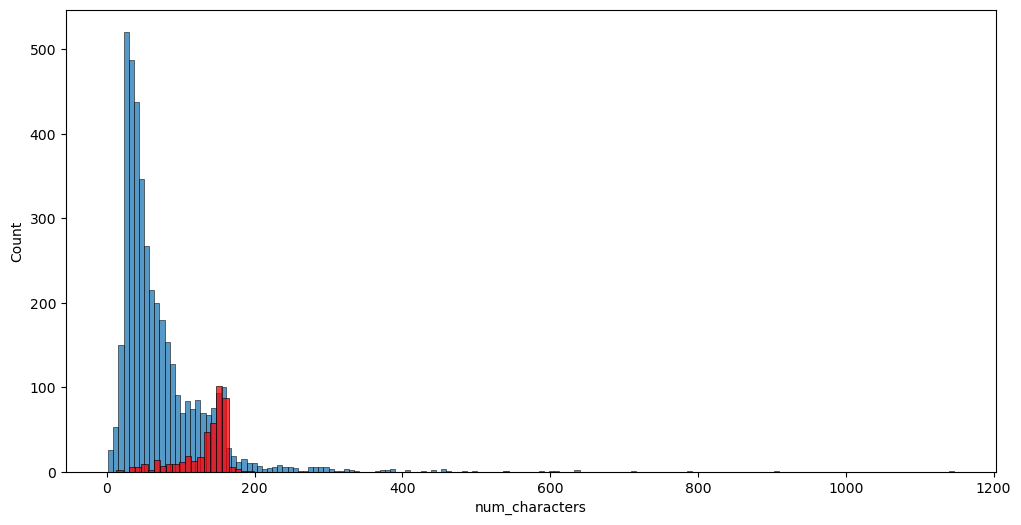

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='word_lengths', ylabel='Count'>

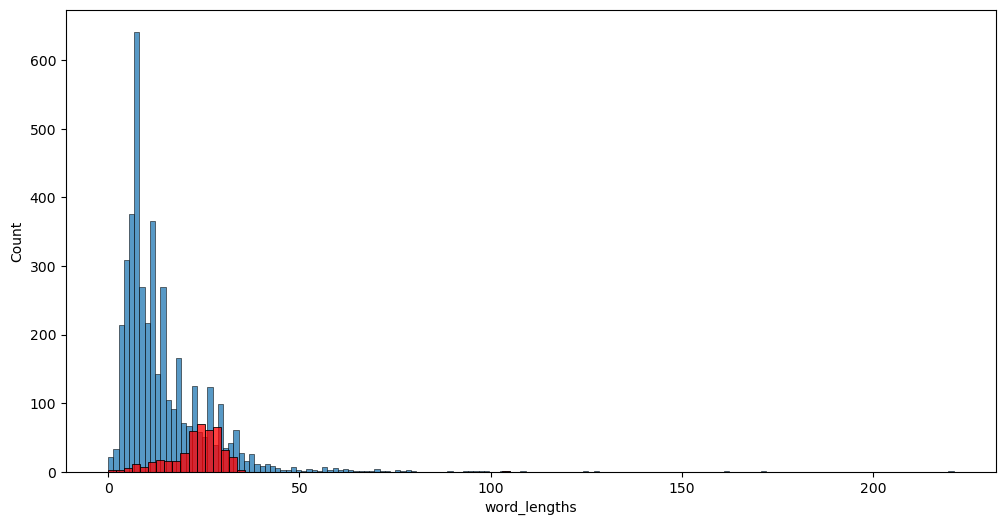

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['word_lengths'])  #ham
sns.histplot(df[df['target']==1]['word_lengths'],color='red')  #spam

<Axes: xlabel='total sentences', ylabel='Count'>

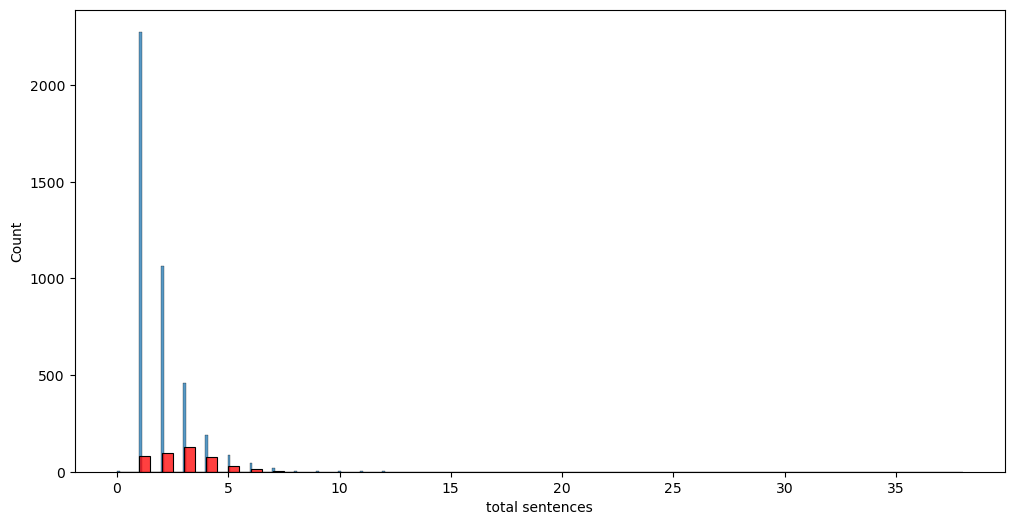

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['total sentences'])   #ham
sns.histplot(df[df['target']==1]['total sentences'],color='red')   #spam

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


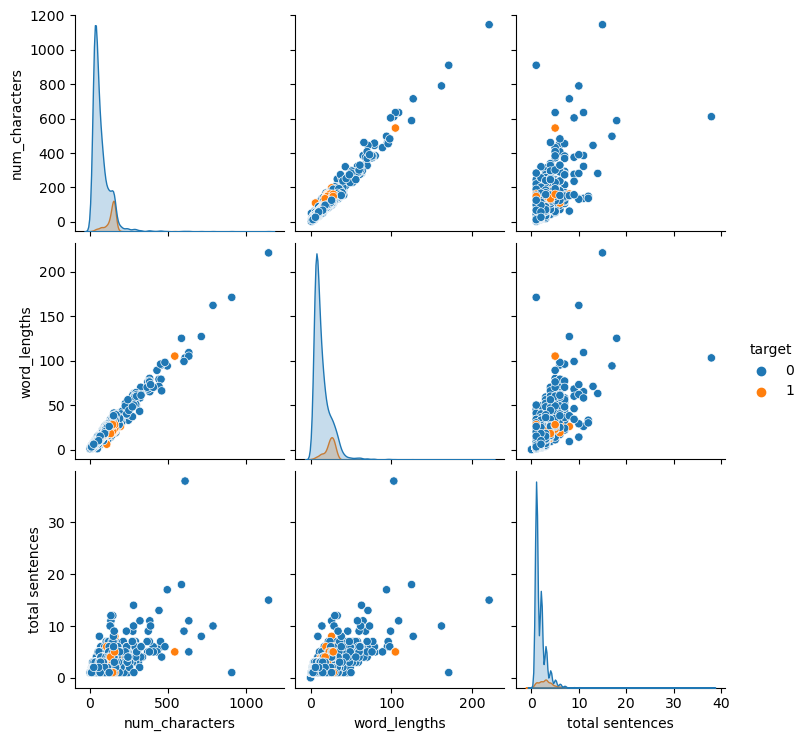

In [35]:
sns.pairplot(df,hue='target')

In [37]:
#sns.heatmap(df.corr(),annot=True)               #no charecter corre with targer 0.38

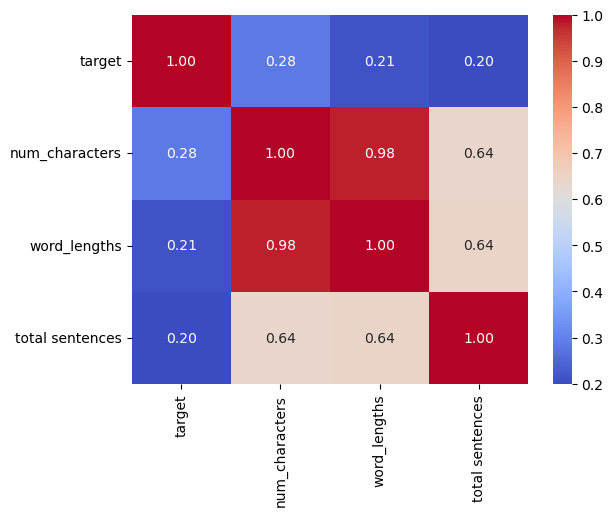

In [39]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()  # Compute correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string

In [42]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
import pandas as pd

# Assuming 'column_name' is the column with mixed types
df['text'] = df['text'].astype(str)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13496\2376533775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].astype(str)


In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [46]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [47]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [48]:
df['transformed_column']=df['text'].apply(transform_text)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13496\2325172051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_column']=df['text'].apply(transform_text)


In [49]:
df.head()

,target,text,num_characters,word_lengths,total sentences,transformed_column
0,0,"Go until jurong point, crazy.. Available only ...",111.0,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29.0,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49.0,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,13,1,nah think goe usf live around though


In [50]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
  Using cached wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp311-cp311-win_amd64.whl (299 kB)


In [51]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_column'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

6496

In [54]:
from collections import Counter
(pd.DataFrame(Counter(spam_corpus).most_common(50))[0])

0        call
1        free
2           2
3        text
4         txt
5       repli
6        stop
7          ur
8       mobil
9           u
10          4
11        get
12       tone
13        new
14     servic
15      nokia
16      phone
17     messag
18       send
19        min
20       week
21       chat
22        per
23      pleas
24      claim
25    contact
26      video
27       want
28          c
29        msg
30       150p
31       date
32     latest
33      orang
34     camera
35          1
36         go
37      offer
38      appli
39    rington
40    network
41         sm
42     custom
43       rate
44        day
45      pound
46       http
47        tri
48       show
49        mob
Name: 0, dtype: object

In [55]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_column'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

33108

In [58]:
from collections import Counter
(pd.DataFrame(Counter(ham_corpus).most_common(70))[0])

0          u
1         go
2        get
3         gt
4         lt
       ...  
65      yeah
66      dear
67    realli
68       let
69    friend
Name: 0, Length: 70, dtype: object

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [60]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [61]:
X=tfidf.fit_transform(df['transformed_column']).toarray()

In [62]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [63]:
X.shape

(4598, 3000)

In [64]:
y=df['target'].values

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8695652173913043
[[748  99]
 [ 21  52]]
0.3443708609271523


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.967391304347826
[[847   0]
 [ 30  43]]
1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9771739130434782
[[845   2]
 [ 19  54]]
0.9642857142857143


In [73]:
#tfidf-mnb

In [74]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.1/124.9 MB 819.2 kB/s eta 0:02:33
   ---------------------------------------- 0.4/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 1.1/124.9 MB 4.8 MB/s eta 0:00:26
   ---------------------------------------- 1.2/124.9 MB 5.0 MB/s eta 0:00:25
    --------------------------------------- 1.9/124.9 MB 5.9 MB/s eta 0:00:21
    --------------------------------------- 2.5/124.9 MB 6.8 MB/s eta 0:00:18
   - ---------------------------

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [78]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [79]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9760869565217392, 0.9811320754716981)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))